## Présentation
Un problème classique dans le domaine de la reconnaissance de formes est celui de la reconnaissance de chiffres manuscrits

Le but de ce projet est de développer un modèle capable d'identifier correctement le chiffre (entre 0 et 9) écrit dans une image. Vous utiliserez pour cela l’algorithme SVM qui devrait correctement classifier les chiffres manuscrits de 0 à 9 en fonction des valeurs de pixels données comme caractéristiques. Chaque image contenant un chiffre est de 28 x 28 pixels et que chaque pixel forme une caractéristique, il y a 784 caractéristiques.

Avec un sous-échantillon de 10 à 20% des données d'entraînement, nous devrions nous attendre à obtenir une précision de plus de 90%. Vous vous appuierez sur le dataset sur le lien suivant : https://www.kaggle.com/c/digit-recognizer/data Il s’appuie sur la base de données MNIST qui est une base de données de chiffres écrits à la main : http://yann.lecun.com/exdb/mnist/

Pour plus d’informations faites un tour sur wikipédia !

## Les différentes étapes  
**Etape 1** : Organisez votre projet  

- Commencez par lister les différentes étapes de votre projet et répartissez-vous de façon équitable les tâches  

- Organisez des points d’avancement au sein de votre équipe pour partager vos avancées et vos difficultés.  

**Etape 2** : Décrivez votre jeu de données  

- Vérifiez les valeurs manquantes, la taille, le type etc…  

- Identifiez les valeurs uniques et le nombre de données pour chaque valeur unique  

**Etape 3** : Visualisez votre jeu de données  

- Affichez quelques chiffres  

- Visualisez la matrice de corrélation de pixels. Est-ce normal ?  

**Etape 4** : Préparez vos données

- D’après vous est-il nécessaire de standardiser vos données ? Pourquoi ?


**Etape 5** : Construisez votre modèle  

- Essayez tout d’abord un modèle lineaire avec l’option linear kernel  

- Puis essayez ‘poly’  

- Et ‘rbf’  

-  Utilisez dans un premier temps les paramètres par défaut.  

**Etape 6** : Evaluez votre modèle

>En affichant pour chacun des modèles que vous avez construit :  
-  la matrice de confusion
-  le classification report
-  la courbe ROC 

**Etape 7** : Choisissez le meilleur et optimisez les paramètres

En utilisant GridsearchCV :  
-  déterminer les paramètres optimaux et réimplémenter le modèle
-  Quel score obtenez-vous ?

**Etape 8** : Optionnel

-  Affichez quelques prédictions

**CONCLUSION**

-  Rédigez votre rapport en établissant le contexte
-  Décrire vos choix et méthode d’analyse
-  Expliciter le rôle de chacun dans ce projet. Soyez synthétique !
-  Plus de 2-3 pages écrites et vos lecteurs ne le liront pas en entier

In [111]:

# On charge les librairies

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve

from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler

from sklearn.preprocessing import label_binarize

In [2]:
# Le fichier .csv a été chargé dans le dossier data
# On récupère le jeu de données sous forme de Dataframe grâce à Pandas

df = pd.read_csv('data/train.csv')

---
### Etape 2 : Décrivez votre jeu de données  

#### Dimension de la Dataframe chargée en mémoire :

In [3]:
# On vérifie les dimensions de la Dataframe

df.shape

(42000, 785)

On constate qu'on obtient **42.000** entrée et **785** colonnes.  
On note que 28x28 = **784**, le nombre de colonnes est donc cohérent.  
Examinons le contenu des colonnes de plus près :  

#### Type de données des colonnes :  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


L'information importante est que toutes les colonnes contiennent des **entiers** de type **int64**.  

#### Intitulé des colonnes :
-  Examen des premières entrées de la Dataframe

In [49]:
# On examine les 10 premières entrées de la Dataframe

df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A priori, les entrées correspondent à nos attentes :  
-  on a une colonne 'label' qui semble correspondre à un chiffre  
-  on a bien 784 pixels numérotés de 0 à 783 pour un chiffre  

#### Valeurs prises par les colonnes :
-  Examen global :  

In [6]:
# On examine les valeurs prises par les colonnes
df.describe()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


L'information la plus importante est que les valeurs entières de la colonne 'label' se situent bien entre 0 et 9.  
Les pixels 1-8 et 780-783 ne prennent que la valeur nulle, ce qui s'explique sans doute par le fait qu'ils soient au bord de l'image.  
Les pixels 774 à 778 prennent principalement la valeur nulle et plafonnent à 253-254.  
On soupçonne fortement à ce stade que l'intensité des pixels est codée sur 8 bits de 0 à 255, ce qui requiert une confimation.  

-  Valeurs de 'label' :

In [7]:
# On obtient la réparation des 10 valeurs de 'label'
# On passe par une Dataframe pour garder l'ordre des valeurs et rendre la sortie plus 'jolie'

pd.DataFrame(df.label.value_counts()).sort_index()

,label
0,4132
1,4684
2,4177
3,4351
4,4072
5,3795
6,4137
7,4401
8,4063
9,4188


La répartition des valeurs est tout à fait raisonnable, on note juste que le nombre de 5 est un peu moins bien représenté.

-  Valeurs des pixels :  

In [8]:
# On calcule le maximum des colonnes
# On selectionne les maxima correspondant aux pixels
# On calcule un maximum global à partir de ces maxima

df.max()[1:].max()

255

Les pixels sont bien codés sur ***8 bits** de 0 à 255 comme on le soupçonnait.

In [31]:
intensity_flat_array = np.array(df.iloc[:,1:]).flat
hist_count = np.zeros(256)

for intensity_value in intensity_flat_array:
    hist_count[intensity_value] += 1

Répartition des valeurs d'intensité sous forme graphique :

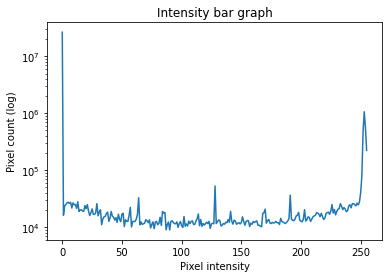

In [50]:
# plotting
plt.title("Intensity bar graph")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel count (log)")
plt.semilogy(range(256),hist_count)

Les valeurs d'intensités sont réparties de manière assez homogène à deux exceptions près :  

-  la valeur nulle trés abondante
-  les intensités supérieures à 250 sont surreprésentées

---
### Etape 3 : Visualisez votre jeu de données  

- Affichez quelques chiffres  

In [9]:
def affiche(n):
    label = df['label'][n]
    image =  df.iloc[n].drop('label')
    # Print label
    print("Chiffre : ",label)
    # Print the image
    plt.imshow(np.array(image).reshape((28,28)), cmap='Greys_r')

Chiffre :  0


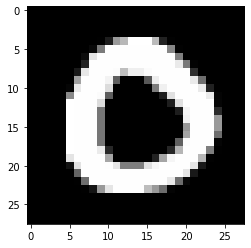

In [10]:
affiche(4)

In [11]:
def affiche9(n):
    fig = plt.figure()
    for i in range(9):
        image =  df.iloc[n+i].drop('label')
        fig.add_subplot(331+i)
        plt.imshow(np.array(image).reshape((28,28)), cmap='Greys_r')

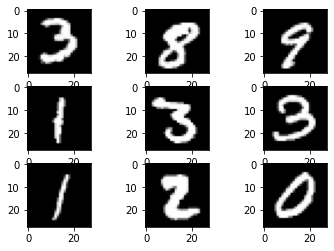

In [12]:
affiche9(9)


-  Visualisez la matrice de corrélation de pixels

Mon interprétation de la question est que l'on considère ici les pixels comme des vecteurs à 42000 lignes.  
L'intérêt d'étudier la corrélation de ces vecteurs est de se faire une idées de l'information contenue dans les pixels.  
Un pixel systématiquement corrélé à un autre n'apportera que peu d'information dans détermination du label.  

Un obstacle d'ordre technique est que certains pixel contiennent 42.000 valeurs nulles ce qui va faire dérailler les calculs de corrélation. Une première étable est donc de filter les vecteurs pixels non-nuls.

In [74]:
# Calcul du critère de selection des colonnes
df_MaxVal = df.max()
df_select_onMax = df_MaxVal>0

# Création de la liste des colonnes sectionnées
# Il est immédiat de sélectionner des entrées (lignes), pour les colonnes j'ai choisi cette alternative
list_nonzero_cols = [nameCol for nameCol in df_select_onMax.keys() if df_select_onMax[nameCol ]]
list_nonzero_cols=list_nonzero_cols[1:]


In [76]:
# Calcul de la matrice de corrélation : 2 min sur ma machine
df_corr = df[list_nonzero_cols].corr()

<AxesSubplot:>

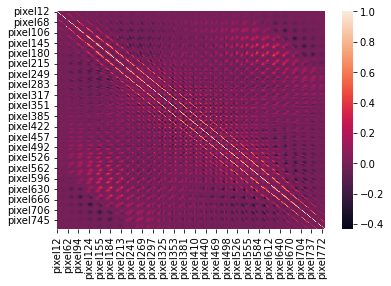

In [77]:
sns.heatmap(df_corr)

Details de la matrice de corrélation : 

<AxesSubplot:>

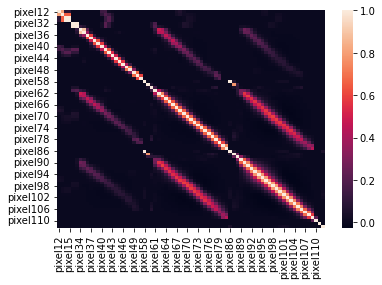

In [86]:
sns.heatmap(df_corr.iloc[:75,:75] )

Les valeurs sur la diagonale principale sont de 1.0 comme attendu.  
On observe la présence de droites parallèles à cette diagonales décalées horizontalement de 28 pixels par rapport à celle-ci.  
Ce décalage horizontal de 28 pixels sur la matrice de corrélation correspond à un décalage d'une ligne dans l'image 28x28, c'est à dire qu'on examine un pixel voisin  dans la dimension verticale du pixel sur la diagonale.  
Ces droites parallèles correspondent donc à des pixels voisins dans la dimension verticale de l'image, ce voisinage explique la corrélation observée et la présence de ces droites.  

<AxesSubplot:>

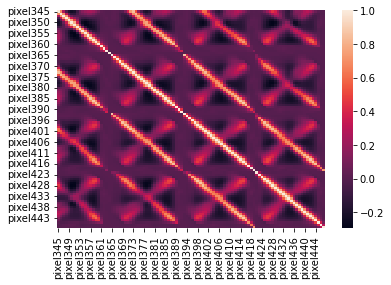

In [83]:
sns.heatmap(df_corr.iloc[300:400,300:400] )

On note sur cette représentation plusieurs éléments remarquables :  
-  des barres horizontales et verticales de faible corrélation, les numéros de pixels sont centrés autour de multiples de 28, cet effet est sans doute du au fait que les pixels concernés sont en bordure du caractère et donc peu significatifs.
-  des droites parallèles à la diagonale principale pour les même raisons
-  des droites perpendiculaires à la diagonale principales correspondant au pixel sur la même ligne du caractère que celui sur la diagonale principale mais symétrique par rapport à l'axe vertical du caractère : en bref ces droites sont le reflet du caractère symétrique des chiffres

-  Est-ce normal ?  

Je pense que les élements remarquables de la mtrice de corrélation ont été expliqués de manière convaincante.  

Concrètement ces observations suggèrent qu'on pourrait simplifier le jeu de données des 3 façons suivantes sans perdre trop d'information :
-  rogner les images de 3 pixels à droite, à gauche, en haut et en bas (6 pixels d'épaisseur pour les barres horizontales et verticales ci-dessus)
-  regrouper les pixels par groupes de 4 (binning) étant donné la corrélation des pixels voisins
-  garder la moitié droite de l'image  (corrélation due à la symétrie)

---
**Etape 4** : Préparez vos données

- D’après vous est-il nécessaire de standardiser vos données ? Pourquoi ?


Une spécificité de ce jeu de données est que les intensités de pixel sont intrinsèquement standardisées entre 0 et 255.  
On pourrait imaginer de standardiser les pixels sur leur intensité maximale ou leur intensité moyenne. Cela supposerait de donner plus d'importance aux pixels de bordure en général de faible intensité et contenant peu d'information.  
Au final, la standardisation ne semble pas s'imposer pour ce jeu de données.  

---
**Etape 5** : Construisez votre modèle  

- Essayez tout d’abord un modèle lineaire avec l’option linear kernel  

- Puis essayez ‘poly’  

- Et ‘rbf’  

-  Utilisez dans un premier temps les paramètres par défaut.

In [87]:
# Selection des coloones features et label
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [88]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [89]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
y_test_pred = sgd_clf.predict(X_test)

In [122]:
sgd_clf.score(X_train,y_train)

0.8969047619047619

---
**Etape 6** : Evaluez votre modèle

En affichant pour chacun des modèles que vous avez construit :  
-  la matrice de confusion  

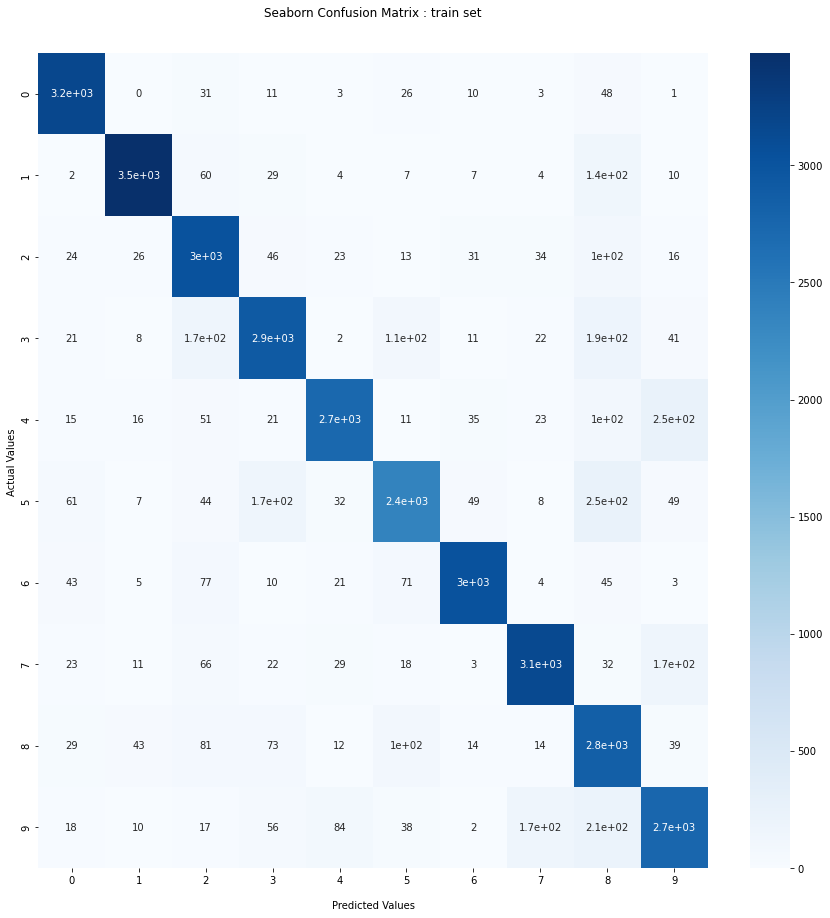

In [94]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, cmap='Blues' )

ax.set_title('Seaborn Confusion Matrix : train set\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

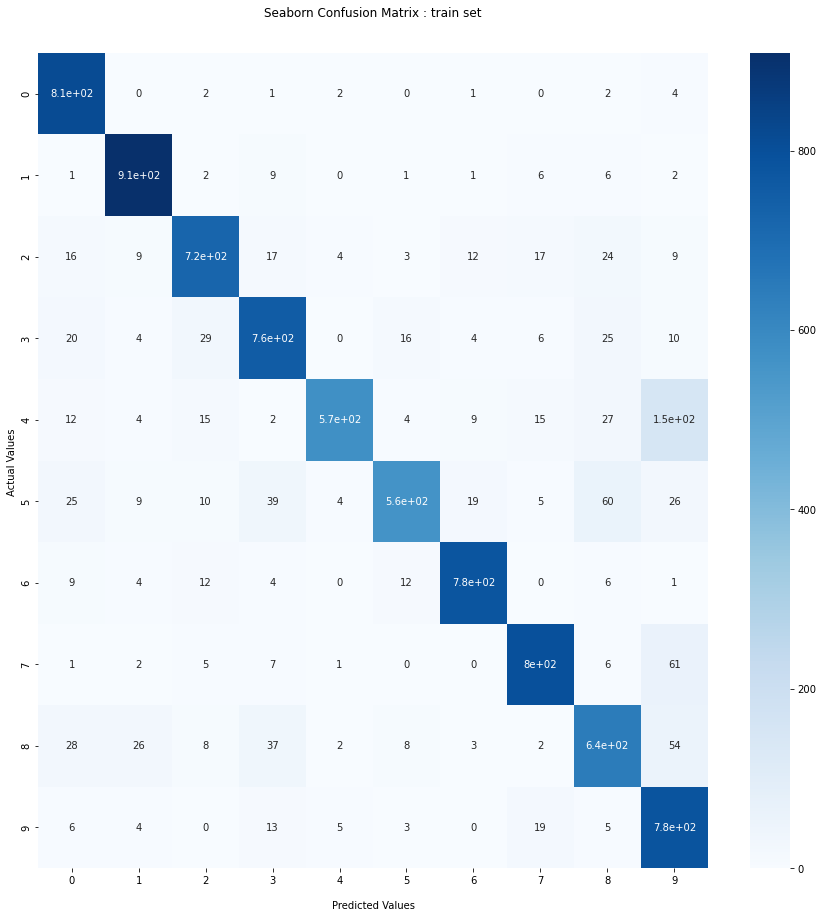

In [95]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix : train set\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

-  le classification report  

In [101]:
print("Classification report with the training set : ")
print(classification_report(y_train, y_train_pred))

Classification report with the training set : 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      3306
           1       0.97      0.93      0.95      3747
           2       0.84      0.90      0.87      3342
           3       0.87      0.84      0.85      3481
           4       0.93      0.84      0.88      3258
           5       0.86      0.78      0.82      3036
           6       0.95      0.92      0.93      3309
           7       0.92      0.89      0.91      3521
           8       0.72      0.87      0.79      3250
           9       0.83      0.82      0.82      3350

    accuracy                           0.88     33600
   macro avg       0.88      0.88      0.88     33600
weighted avg       0.88      0.88      0.88     33600



In [103]:
print("Classification report with the test set : ")
print(classification_report(y_test, y_test_pred))

Classification report with the test set : 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       826
           1       0.94      0.97      0.95       937
           2       0.90      0.87      0.88       835
           3       0.85      0.87      0.86       870
           4       0.97      0.71      0.82       814
           5       0.92      0.74      0.82       759
           6       0.94      0.94      0.94       828
           7       0.92      0.91      0.91       880
           8       0.80      0.79      0.80       813
           9       0.71      0.93      0.81       838

    accuracy                           0.87      8400
   macro avg       0.88      0.87      0.87      8400
weighted avg       0.88      0.87      0.87      8400



-  la courbe ROC 

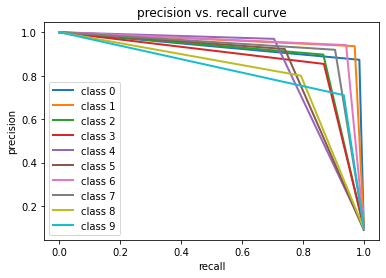

In [117]:
# adapté de https://stackoverflow.com/questions/56090541/how-to-plot-precision-and-recall-of-multiclass-classifier
# Comme la courbe ROC n'est pas adapté à une situation multiclasse on se ramène à un système de classes binaire
# en 'binarisant' le label y on se retrouve avec 10 systèmes binaires, individuellement adapté à une courbe ROC.

n_classes = len(set(y))
Y_test = label_binarize(y_test, classes=[*range(n_classes)])
Y_test_pred = label_binarize(y_test_pred, classes=[*range(n_classes)])

# precision recall curve
precision = {}
recall = {}
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i], Y_test_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()



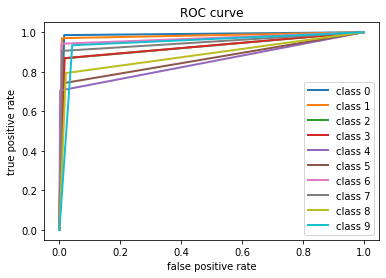

In [118]:
# roc curve
fpr = {}
tpr = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], Y_test_pred[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

Je ne peux pas expliquer pourquoi les courbes sont linéaires par tronçons, cela est sans doute lié au fait que le modèle soit lui même linéaire. Je pourrai en dire plus après avoir mis en oeuvre un modèle non linéaire.

In [112]:
rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(X)
clf = SGDClassifier(max_iter=200)
clf.fit(X_features, y)

clf.score(X_features, y)

0.10433333333333333

---
**Etape 7** : Choisissez le meilleur et optimisez les paramètres

En utilisant GridsearchCV :  
-  déterminer les paramètres optimaux et réimplémenter le modèle
-  Quel score obtenez-vous ?

---
**Etape 8** : Optionnel

-  Affichez quelques prédictions

>Selection de 9 images

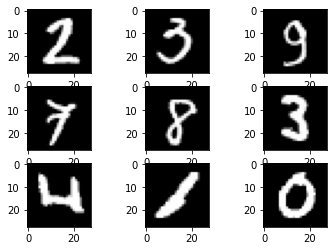

In [113]:
affiche9(40000)

>Prédictions du modèle linéaire organisées en matrice 3x3

In [116]:
np.array(sgd_clf.predict(X[40000:40009])).reshape(3,3)

array([[2, 2, 3],
       [7, 8, 3],
       [0, 1, 0]], dtype=int64)

---
**CONCLUSION**

-  Rédigez votre rapport en établissant le contexte
-  en décrivant vos choix et méthode d’analyse
-  en explicitant le rôle de chacun dans ce projet. Soyez synthétique !
-  plus de 2-3 pages écrites et vos lecteurs ne le liront pas en entier